# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

In [ ]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/My Drive/')

In [2]:
import os

In [7]:
os.getcwd()

'/content/drive/My Drive/ITP/Lab/Neural Network'

In [5]:
os.chdir('/content/drive/MyDrive/ITP/Lab/Neural Network')

In [8]:
os.getcwd()

'/content/drive/My Drive/ITP/Lab/Neural Network'

In [10]:
import numpy as np
import pandas as pd
df=pd.read_csv('prices.csv')

In [11]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

In [12]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## there are no null values in the data

In [14]:
df.shape

(851264, 7)

### Drop null
- Drop null values if any

## There are no null values and hence there is no action required

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [15]:
df.drop(["date", "volume", "symbol"],axis=1,inplace=True)

In [17]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [19]:
df.sample(5)

,open,close,low,high
239578,29.000000,29.200001,29.000000,29.400000
318760,55.150002,56.830002,55.060001,56.970001
688330,175.190002,176.509995,173.940002,177.600006
675279,40.299999,40.570000,40.279999,40.810001
56192,41.610001,41.000000,40.900002,41.779999


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [22]:
X=df.drop(['close'],axis=1)
y=df['close']

In [23]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [24]:
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=23)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(595884, 3)
(255380, 3)
(595884,)
(255380,)


## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)



In [37]:
X_train_scaled

array([[-0.33768355, -0.34165097, -0.34025805],
       [ 0.19632641,  0.20427044,  0.20408075],
       [ 1.00966853,  1.01704904,  1.01335483],
       ...,
       [ 0.34437002,  0.29648605,  0.34034332],
       [-0.33349479, -0.33077366, -0.33836057],
       [-0.41200457, -0.41344141, -0.41603859]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [38]:
print(type(X_train_scaled))
print(type(X_test_scaled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


### y_train & y_test converted from pandas series to numpy array

In [42]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
np.mean(X_train_scaled)

-1.7704424467174967e-16

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
model = Sequential([Flatten(), 
                    Dense(1,activation='linear')
                   ])
  

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [53]:
model.compile(optimizer='sgd',loss='mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [54]:
model.fit(X_train_scaled, y_train, batch_size=128, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
4656/4656 [==============================] - 11s 2ms/step - loss: 248.0355 - val_loss: 0.9880
Epoch 2/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9597 - val_loss: 0.9981
Epoch 3/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9482 - val_loss: 0.9821
Epoch 4/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9769 - val_loss: 0.9709
Epoch 5/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9649 - val_loss: 0.9654
Epoch 6/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9413 - val_loss: 0.9534
Epoch 7/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9646 - val_loss: 0.9548
Epoch 8/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9155 - val_loss: 0.9409
Epoch 9/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.9465 - val_loss: 0.9357
Epoch 10/50
4656/4656 [==============================] - 9s 2ms/step - loss: 0.

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [55]:
model.evaluate(X_test_scaled, y_test)

7981/7981 [==============================] - 9s 1ms/step - loss: 0.7370


0.7369956374168396

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [57]:
open =123.430000
low=122.30999
high=116.250000
model.predict(sc.transform([[123.430000,122.30999,116.250000]]))

array([[119.79501]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [104]:
import tensorflow as tf
(trainX, trainY), (x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [59]:
print(trainX.shape)
print(trainY.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Change train and test labels into one-hot vectors

In [105]:
trainY=tf.keras.utils.to_categorical(trainY)
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [106]:
y_test=tf.keras.utils.to_categorical(y_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [108]:
model_2 = Sequential()
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))
model_2.add(tf.keras.layers.BatchNormalization())


In [109]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
Total params: 3,136
Trainable params: 1,568
Non-trainable params: 1,568
_________________________________________________________________


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [110]:
model_2.add(tf.keras.layers.Dense(200, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation='relu')) 
model_2.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [111]:
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [112]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss')
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')


### Print model summary

In [100]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

###Train your model, use test data as validation set

In [113]:
history = model_2.fit(trainX,trainY,validation_data=(x_test,y_test),epochs=10,batch_size=32,callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6285 - accuracy: 0.7799 - val_loss: 0.3971 - val_accuracy: 0.8550
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4004 - accuracy: 0.8547 - val_loss: 0.3768 - val_accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3663 - accuracy: 0.8660 - val_loss: 0.3785 - val_accuracy: 0.8670
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3364 - accuracy: 0.8758 - val_loss: 0.3859 - val_accuracy: 0.8569


In [102]:
print(trainX.shape)
print(trainY.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10, 2)
(10000, 28, 28)
(10000, 10)


###Predict Labels

In [114]:
model_2.predict(x_test)[2]

array([1.4779213e-11, 1.0000000e+00, 1.5091310e-14, 4.0394685e-10,
       5.7691291e-12, 7.1397276e-24, 5.0171624e-13, 1.2625965e-21,
       1.3309341e-15, 5.5107467e-21], dtype=float32)

In [115]:
y_pred=np.argmax(model_2.predict(x_test),axis=-1)

In [116]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [117]:
(trainX, trainY), (x_test_1,y_test_1)= tf.keras.datasets.fashion_mnist.load_data()

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_1,y_pred)

array([[859,   0,   5,  45,   6,   0,  75,   0,   9,   1],
       [  3, 962,   2,  27,   3,   0,   2,   0,   1,   0],
       [ 19,   1, 578,  19, 127,   1, 244,   0,  11,   0],
       [ 20,   6,   4, 924,  20,   1,  18,   0,   6,   1],
       [  0,   1,  49,  42, 758,   0, 148,   0,   2,   0],
       [  1,   0,   0,   2,   0, 943,   0,  25,   5,  24],
       [176,   1,  36,  39,  47,   0, 688,   0,  13,   0],
       [  0,   0,   0,   0,   0,  27,   0, 935,   0,  38],
       [  4,   1,   3,   6,   3,   3,   6,   3, 971,   0],
       [  0,   0,   0,   1,   0,   8,   0,  38,   2, 951]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

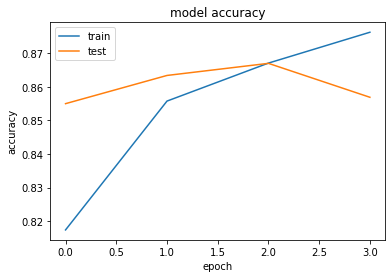

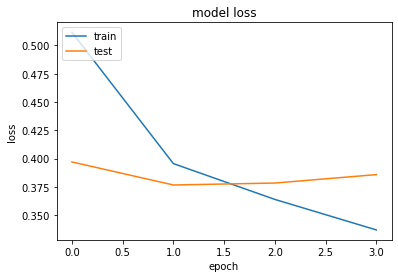

In [119]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
